# Neuroimaging Practice

(480, 480, 128)


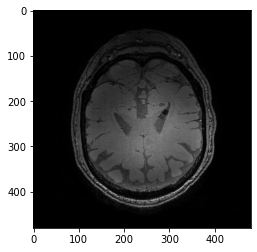

In [166]:
import nibabel as nib
import numpy as np
img = nib.load("sub-0218_ses-1_acq-sb_inv-2_echo-1_part-mag_mprage.nii")
arr = img.get_fdata()
x_slice = arr[240,:,:]
y_slice = arr[:,9,:]
z_slice = arr[:,:,127]

import matplotlib.pyplot as plt
%matplotlib inline

# slices = [x_slice, y_slice, z_slice]
fig = plt.figure()
ax = plt.axes()
ax.imshow(z_slice.T,cmap="gray")
print(arr.shape)

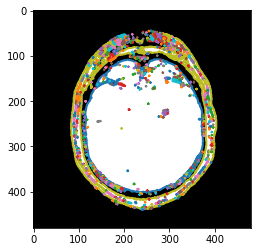

In [167]:
# binarize function
def binarize(slic,thresh):
    binarized = (slic > thresh) * 255
    binarized = np.uint8(binarized)
    return binarized
binbrain = binarize(z_slice,np.mean(z_slice)).T
from skimage.measure import find_contours
contours = find_contours(binbrain)
plt.imshow(binbrain,cmap="gray")
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)

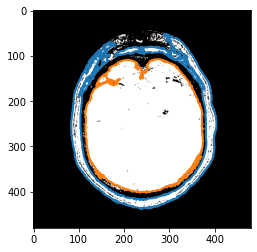

In [168]:
def contour_distance(contour):
    dx = contour[0, 1] - contour[-1, 1]
    dy = contour[0, 0] - contour[-1, 0]
    return np.sqrt(np.power(dx, 2) + np.power(dy, 2))

def set_is_closed(contour):
    if contour_distance(contour) < 1:
        return True
    else:
        return False
    
from scipy.spatial import ConvexHull
big_contours = []
hull_volumes = []

for contour in contours:
    hull = ConvexHull(contour)
    if hull.volume > 2000 and set_is_closed(contour):
        big_contours.append(contour)
        hull_volumes.append(hull.volume)
# body_and_lung_contours = 
ax = plt.axes()
ax.imshow(binbrain,cmap='gray')
for contour in big_contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

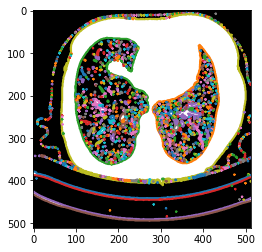

In [127]:
img2 = nib.load(r"C:\Users\mayap\Programming\Neuroimaging\Images\Images\slice010.nii.gz")
arr2 = img2.get_fdata()
arr2 = arr2.clip(-1000,-300)
thresh = (np.mean(arr2))
binarized = binarize(arr2,thresh).T
from skimage.measure import find_contours
contours = find_contours(binarized)
ax = plt.axes()
ax.imshow(binarized,cmap='gray')
for n, contour in enumerate(contours):
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

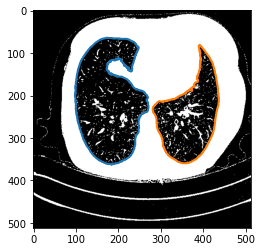

In [155]:
# find area of each contour
body_and_lung_contours = []
hull_volumes = []

for contour in contours:
    hull = ConvexHull(contour)
    if hull.volume > 2000 and hull.volume < 41000 and set_is_closed(contour):
        body_and_lung_contours.append(contour)
        hull_volumes.append(hull.volume)
ax = plt.axes()
ax.imshow(binarized,cmap='gray')
for contour in body_and_lung_contours:
    ax.plot(contour[:, 1], contour[:, 0], linewidth=2)

In [ ]:
# later make a binary segmentation mask

**Later: Replicate LCPC method on an MRI slice**

In [ ]:
# take a slice and segment - can use the lung segmentations done in CT image